# 6.1 Discrete least squares

## Arya's adventures in the physics lab

College life is expensive, and Arya is happy to land a job working at a physics lab for some extra cash. She does some experiments, some data analysis, and a little grading. In one experiment she conducted, where there is one independent variable $x$, and one dependent variable $y$, she was asked to plot $y$ against $x$ values. (There are a total of six data points.) She gets the following plot:

<img src="./images/scatter_plot.png" class="bg-primary mb-1" width="400px">

Scatter plot of data

Arya's professor thinks the relationship between the variables should be
linear, but we do not see data falling on a perfect line because of
measurement error. The professor is not happy, professors are usually not happy when lab results act up, and asks Arya to come up with a linear formula,
something like $y=ax+b,$ to explain the relationship. Arya first thinks about interpolation, but quickly realizes it is not a good idea. (Why?). Let's help Arya with her problem.

## Analysis of the problem

Let's try passing a line through the data points. The following figure
plots one such line, $y=3x-0.5$, together with the data points.

<img src="./images/scatter_plot_line.png" class="bg-primary mb-1" width="400px">

Data with an approximating line

There are certainly many other choices we have for the line: we could increase or decrease the slope a little, change the intercept a bit, and obtain multiple lines that have a visually good fit to the data. The crucial question is, how can we decide which line is the "best" line, among all the possible lines? If we can quantify how good the fit of a given line is to the data, and come up with a notion for error, perhaps then we can find the line that minimizes this error.

Let's generalize the problem a little. We have:

- Data: $(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{m},y_{m})$

and we want to find a line that gives the "best" approximation to the data:

- Linear approximation: $y=f(x)=ax+b$

The questions we want to answer are:

1. What does "best" approximation mean?
2. How do we find $a,b$ that gives the line with the "best" approximation?

Observe that for each $x_{i}$, there is the corresponding $y_{i}$
of the data point, and $f(x_{i})=ax_{i}+b,$ which is the predicted
value by the linear approximation. We can measure error by considering
the deviations between the actual $y$ coordinates and the predicted
values:
\begin{equation*}
(y_{1}-ax_{1}-b),(y_{2}-ax_{2}-b),...,(y_{m}-ax_{m}-b)
\end{equation*}
There are several ways we can form a measure of error using these
deviations, and each approach gives a different line approximating the data. The best approximation means finding
$a,b$ that minimizes the error measured in one of the following ways:

- $E=\max_{i}\left\{ |y_{i}-ax_{i}-b|\right\} $ ; minimax problem
- $E=\sum_{i=1}^{m}|y_{i}-ax_{i}-b|$; absolute deviations
- $E=\sum_{i=1}^{m}(y_{i}-ax_{i}-b)^{2}$; least squares problem

In this chapter we will discuss the least squares problem, the simplest
one among the three options. We want to minimize
\begin{equation*}
E=\sum_{i=1}^{m}(y_{i}-ax_{i}-b)^{2}
\end{equation*}
with respect to the parameters $a,b.$ For a minimum to occur, we
must have
\begin{equation*}
\frac{\partial E}{\partial a}=0\text{ and }\frac{\partial E}{\partial b}=0.
\end{equation*}
We have:
\begin{align*}
\frac{\partial E}{\partial a} & =\sum_{i=1}^{m}\frac{\partial E}{\partial a}(y_{i}-ax_{i}-b)^{2}=\sum_{i=1}^{m}(-2x_{i})(y_{i}-ax_{i}-b)=0\\
\frac{\partial E}{\partial b} & =\sum_{i=1}^{m}\frac{\partial E}{\partial b}(y_{i}-ax_{i}-b)^{2}=\sum_{i=1}^{m}(-2)(y_{i}-ax_{i}-b)=0
\end{align*}
Using algebra, these equations can be simplified as
\begin{align*}
b\sum_{i=1}^{m}x_{i}+a\sum_{i=1}^{m}x_{i}^{2} & =\sum_{i=1}^{m}x_{i}y_{i}\\
bm+a\sum_{i=1}^{m}x_{i} & =\sum_{i=1}^{m}y_{i},
\end{align*}
which are called the **normal equations**. The solution to this system
of equations is
\begin{align*}
a  =\frac{m\sum_{i=1}^{m}x_{i}y_{i}-\sum_{i=1}^{m}x_{i}\sum_{i=1}^{m}y_{i}}{m\left(\sum_{i=1}^{m}x_{i}^{2}\right)-\left(\sum_{i=1}^{m}x_{i}\right)^{2}},
b  =\frac{\sum_{i=1}^{m}x_{i}^{2}\sum_{i=1}^{m}y_{i}-\sum_{i=1}^{m}x_{i}y_{i}\sum_{i=1}^{m}x_{i}}{m\left(\sum_{i=1}^{m}x_{i}^{2}\right)-\left(\sum_{i=1}^{m}x_{i}\right)^{2}}.
\end{align*}

Let's consider a slightly more general question. Given data

- Data: $(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{m},y_{m})$

can we find the best polynomial approximation

- Polynomial approximation: $P_{n}(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{0}$

where $m$ will be usually much larger than $n$.
Similar to the above discussion, we want to minimize
\begin{equation*}
E=\sum_{i=1}^{m}(y_{i}-P_{n}(x_{i}))^{2}=\sum_{i=1}^{m}\left(y_{i}-\sum_{j=0}^{n}a_{j}x_{i}^{j}\right)^{2}
\end{equation*}
with respect to the parameters $a_{n},a_{n-1},...,a_{0}$. For a minimum
to occur, the necessary conditions are
\begin{equation*}
\frac{\partial E}{\partial a_{k}}=0\Rightarrow-\sum_{i=1}^{m}y_{i}x_{i}^{k}+\sum_{j=0}^{n}a_{j}\left(\sum_{i=1}^{m}x_{i}^{k+j}\right)=0
\end{equation*}
for $k=0,1,...,n$. (we are skipping some algebra here!) The **normal
equations** for polynomial approximation are

\begin{equation}\label{eq:discrete_normal}
\sum_{j=0}^{n}a_{j}\left(\sum_{i=1}^{m}x_{i}^{k+j}\right)=\sum_{i=1}^{m}y_{i}x_{i}^{k}
\end{equation}

for $k=0,1,...,n.$ This is a system of $(n+1)$ equations and $(n+1)$
unknowns. We can write this system as a matrix equation

\begin{equation}\label{eq:leastsqmatrixeq}
A\boldsymbol{a}=\boldsymbol{b}
\end{equation}

where $\boldsymbol{a}$ is the unknown vector we are trying to find, and $\boldsymbol{b}$ is the constant vector
\begin{equation*}
\boldsymbol{a}=\begin{bmatrix}
a_0\\
a_1\\
\vdots \\
a_n
\end{bmatrix},
\boldsymbol{b}=\begin{bmatrix}
\sum_{i=1}^{m}y_{i}\\
\sum_{i=1}^{m}y_{i}x_{i}\\
\vdots\\
\sum_{i=1}^{m}y_{i}x_{i}^{n}
\end{bmatrix}
\end{equation*}
and $A$ is an $(n+1)$ by $(n+1)$ symmetric matrix with $(k,j)$th entry $A_{kj}, k=1,...,n+1, j=1,2,...,n+1$ given by
\begin{equation*}
A_{kj}=\sum_{i=1}^m x_i^{k+j-2}.
\end{equation*}
The equation $A\boldsymbol{a}=\boldsymbol{b}$ has a unique solution if the $x_{i}$ are distinct, and $n\leq m-1$. Solving this equation by computing the inverse matrix $A^{-1}$ is not advisable, since there could be significant roundoff error. Next, we will write a Python code for least squares approximation, and use the Python function $np.linalg.solve(A, b)$ to solve the matrix equation $A\boldsymbol{a}=\boldsymbol{b}$ for $\boldsymbol{a}$. The $np.linalg.solve$ function in Python uses numerically optimized matrix factorizations based on the LAPACK routine to solve the matrix equation. More details on this topic can be found in Heath [1997] (Chapter 3).

## Python code for least squares approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The function **leastsqfit** takes the $x$- and
$y$-coordinates of the data, and the degree of the polynomial we want
to use, $n$, as inputs. It solves the matrix Equation \eqref{eq:leastsqmatrixeq}.

In [2]:
def leastsqfit(x, y, n):
    m = x.size # number of data points
    d = n+1 # number of coefficients to be determined
    A = np.zeros((d, d))
    b = np.zeros(d)
    # the linear system we want to solve is Ax=b
    p = np.zeros(2*n+1)
    for k in range(d):
        sum = 0
        for i in range(m):
            sum += y[i]*x[i]**k
        b[k] = sum
    # p[i] below is the sum of the ith power of the x coordinates
    p[0] = m
    for i in range(1, 2*n+1):
        sum = 0
        for j in range(m):
            sum += x[j]**i
        p[i] = sum    
    # We next compute the upper triangular part of the coefficient
    # matrix A, and its diagonal
    for k in range(d):
        for j in range(k, d):
            A[k, j] = p[k+j]
    # The lower triangular part of the matrix is defined using the
    # fact the matrix is symmetric
    for i in range(1, d):
        for j in range(i):
            A[i, j] = A[j, i]
    a = np.linalg.solve(A, b)
    return a

Here is the data used to produce the first plot of the chapter: Arya's
data:

In [3]:
xd = np.array([1, 2, 3, 4, 5, 6])
yd = np.array([3, 5, 9.2, 11, 14.5, 19])

We fit a least squares line to the data:

In [4]:
leastsqfit(xd, yd, 1)

array([-0.74666667,  3.15142857])

The polynomial is $-0.746667+3.15143x$. The next function
**poly(x,a)** takes the output of $a=$**leastsqfit**,
and evaluates the least squares polynomial at $x$.

In [5]:
def poly(x, a):
    d = a.size
    sum = 0
    for i in range(d):
        sum += a[i]*x**i
    return sum

For example, if we want to compute the least squares line at 3.5, we
call the following functions:

In [6]:
a = leastsqfit(xd, yd, 1)
poly(3.5, a)

10.283333333333335

The next function computes the least squares error:
$E=\sum_{i=1}^m(y_i-p_n(x_i))^2$. It takes the output of
$a=$**leastsqfit**, and the data, as inputs.

In [7]:
def leastsqerror(a, x, y):
    sum = 0
    m = y.size
    for i in range(m):
        sum += (y[i]-poly(x[i],a))**2
    return sum

In [8]:
a = leastsqfit(xd, yd, 1)
leastsqerror(a, xd, yd)

2.6070476190476177

Next we plot the least squares line and the data together.

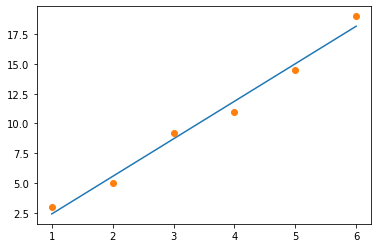

In [9]:
a = leastsqfit(xd, yd, 1)
xaxis = np.linspace(1, 6, 500)
yvals = poly(xaxis, a)
plt.plot(xaxis, yvals)
plt.plot(xd, yd, 'o');

We try a second degree polynomial in least squares approximation next.

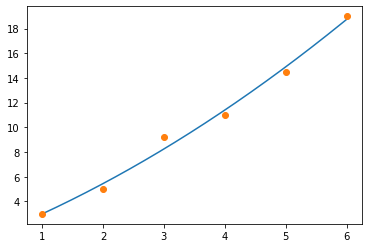

In [10]:
a = leastsqfit(xd, yd, 2)
xaxis = np.linspace(1, 6, 500)
yvals = poly(xaxis, a)
plt.plot(xaxis, yvals)
plt.plot(xd, yd, 'o');

The corresponding error is:

In [11]:
leastsqerror(a, xd, yd)

1.4869285714285714

The next polynomial is of degree three:

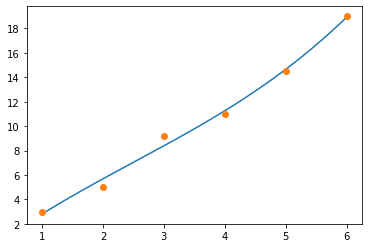

In [12]:
a = leastsqfit(xd, yd, 3)
xaxis = np.linspace(1, 6, 500)
yvals = poly(xaxis, a)
plt.plot(xaxis, yvals)
plt.plot(xd, yd, 'o');

The corresponding error is:

In [13]:
leastsqerror(a, xd, yd)

1.2664285714285732

The next polynomial is of degree four:

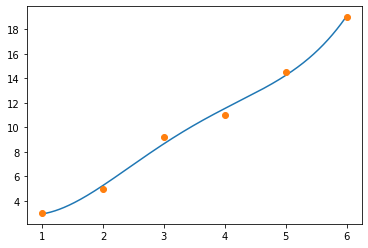

In [14]:
a = leastsqfit(xd, yd, 4)
xaxis = np.linspace(1, 6, 500)
yvals = poly(xaxis, a)
plt.plot(xaxis, yvals)
plt.plot(xd, yd, 'o');

The least squares error is:

In [15]:
leastsqerror(a, xd, yd)

0.723214285714292

Finally, we try a fifth degree polynomial. Recall that the normal
equations have a unique solution when $x_i$ are distinct, and
$n\leq m-1$. Since $m=6$ in this example, $n=5$ is the largest
degree with guaranteed unique solution.

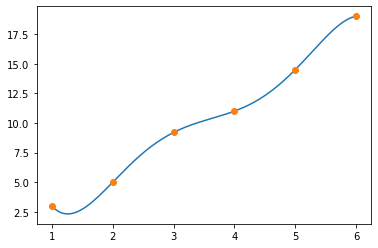

In [16]:
a = leastsqfit(xd, yd, 5)
xaxis = np.linspace(1, 6, 500)
yvals = poly(xaxis, a)
plt.plot(xaxis, yvals)
plt.plot(xd, yd, 'o');

The approximating polynomial of degree five is the interpolating
polynomial! What is the least squares error?

## Least squares with non-polynomials

The method of least squares is not only for polynomials. For example, suppose we want to find the function

\begin{equation}\label{eq:tempf}
f(t)=a+bt+c \sin(2\pi t/365)+d \cos (2\pi t/365)
\end{equation}

that has the best fit to some data $(t_1,T_1),...,(t_m,T_m)$ in the least-squares sense. This function is used in modeling weather temperature data, where $t$ denotes time, and $T$ denotes the temperature. The following figure plots the daily maximum temperature during a period of 1,056 days, from 2016 until November 21, 2018, as measured by a weather station at Melbourne airport, Australia[^1].

<img src="./images/tempdata.png" class="bg-primary mb-1" width="400px">

To find the best fit function of the form \eqref{eq:tempf}, we write the least squares error term
\begin{equation*}
E=\sum_{i=1}^m (f(t_i)-T_i)^2=\sum_{i=1}^m \left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)^2,
\end{equation*}
and set its partial derivatives with respect to the unknowns $a,b,c,d$ to zero to obtain the normal equations:

\begin{align}
\frac{\partial E}{\partial a}=0 &\Rightarrow \sum_{i=1}^m 2\left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\nonumber  \\
&\Rightarrow \sum_{i=1}^m \left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\label{eq:n1},
\end{align}


\begin{align}
\frac{\partial E}{\partial b}=0 &\Rightarrow \sum_{i=1}^m (2t_i)\left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\nonumber  \\
&\Rightarrow \sum_{i=1}^m t_i\left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\label{eq:n2},
\end{align}


\begin{align}
\frac{\partial E}{\partial c}=0 &\Rightarrow \sum_{i=1}^m \left(2\sin\left(\frac{2\pi t_i}{365}\right)\right)\left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\nonumber  \\
&\Rightarrow \sum_{i=1}^m \sin\left(\frac{2\pi t_i}{365}\right) \left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\label{eq:n3},
\end{align}


\begin{align}
\frac{\partial E}{\partial d}=0 &\Rightarrow \sum_{i=1}^m \left(2\cos\left(\frac{2\pi t_i}{365}\right)\right)\left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\nonumber  \\
&\Rightarrow \sum_{i=1}^m \cos\left(\frac{2\pi t_i}{365}\right) \left(a+bt_i+c \sin\left(\frac{2\pi t_i}{365}\right)+d \cos \left(\frac{2\pi t_i}{365}\right)-T_i\right)=0\label{eq:n4}.
\end{align}


Rearranging terms in equations \eqref{eq:n1}, \eqref{eq:n2}, \eqref{eq:n3}, \eqref{eq:n4}, we get a system of four equations and four unknowns:

\begin{align*}
&am+b \sum_{i=1}^m t_i + c \sum_{i=1}^m \sin\left(\frac{2\pi t_i}{365}\right) + d \sum_{i=1}^m \cos \left(\frac{2\pi t_i}{365}\right)=\sum_{i=1}^m T_i\\
&a \sum_{i=1}^m t_i + b\sum_{i=1}^m t_i^2 + c\sum_{i=1}^m t_i \sin \left(\frac{2\pi t_i}{365}\right) + d \sum_{i=1}^m t_i \cos \left(\frac{2\pi t_i}{365}\right) = \sum_{i=1}^m T_i t_i\\
&a \sum_{i=1}^m \sin\left(\frac{2\pi t_i}{365}\right) + b \sum_{i=1}^m t_i \sin \left(\frac{2\pi t_i}{365}\right) +c \sum_{i=1}^m \sin^2 \left(\frac{2\pi t_i}{365}\right) + d \sum_{i=1}^m \sin \left(\frac{2\pi t_i}{365}\right) \cos \left(\frac{2\pi t_i}{365}\right)\\
&= \sum_{i=1}^m T_i \sin \left(\frac{2\pi t_i}{365}\right)\\
&a \sum_{i=1}^m \cos\left(\frac{2\pi t_i}{365}\right) +  b \sum_{i=1}^m t_i \cos \left(\frac{2\pi t_i}{365}\right) + c \sum_{i=1}^m \sin \left(\frac{2\pi t_i}{365}\right) \cos \left(\frac{2\pi t_i}{365}\right) + d \sum_{i=1}^m \cos^2 \left(\frac{2\pi t_i}{365}\right)\\
&= \sum_{i=1}^m T_i \cos \left(\frac{2\pi t_i}{365}\right)\\
\end{align*}

Using a short-hand notation where we suppress the argument $\left(\frac{2\pi t_i}{365}\right)$ in the trigonometric functions, and the summation indices, we write the above equations as a matrix equation:
\begin{equation*}
\underbrace{
\begin{bmatrix}
m &  \sum t_i & \sum \sin(\cdot) & \sum \cos(\cdot) \\
 \sum t_i&  \sum t_i^2&  \sum t_i \sin(\cdot) & \sum t_i \cos(\cdot)\\
 \sum \sin(\cdot)& \sum t_i \sin(\cdot)& \sum \sin^2(\cdot)& \sum \sin(\cdot) \cos(\cdot) \\
 \sum \cos(\cdot) & \sum t_i \cos(\cdot) & \sum \sin(\cdot) \cos(\cdot)& \sum \cos^2(\cdot)
\end{bmatrix}}_{\mathbf{A}}
\begin{bmatrix}
a\\
b\\
c\\
d
\end{bmatrix}=
\underbrace{
\begin{bmatrix}
\sum T_i\\
\sum T_i t_i\\
\sum T_i \sin(\cdot)\\
\sum T_i \cos(\cdot)
\end{bmatrix}}_{\mathbf{r}}
\end{equation*}
Next, we will use Python to load the data and define the matrices $A, \mathbf{r}$, and then solve the equation $A\mathbf{x}=\mathbf{r}$, where $\mathbf{x}=[a,b,c,d]^T$.

We will use a package called pandas to import data. We import it in our notebook, along with NumPy and Matplotlib:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We assume that the data which consists of temperatures is downloaded as
a csv file in the same directory where the Python notebook is stored.
Make sure the data has no missing entries. The function **pd.read_csv** imports the data into Python as a table (dataframe):

In [19]:
df = pd.read_csv('../data/WeatherData.csv')
df

,Temp
0,28.7
1,27.5
2,28.2
3,24.5
4,25.6
...,...
1051,19.1
1052,27.1
1053,31.0
1054,27.0


The next step is to store the part of the data we need as an array. In our table there is only one column named **Temp**.

In [20]:
temp = df['Temp'].to_numpy()
temp

array([28.7, 27.5, 28.2, ..., 31. , 27. , 22.7])

Let's check the type of **temp**, its first entry, and its length:

In [21]:
type(temp)

numpy.ndarray

In [22]:
temp[0]

28.7

In [23]:
temp.size

1056

There are 1,056 temperature values. The $x$-coordinates are the days,
numbered $t=1,2,...,1056$. Here is the array that stores these time
values:

In [24]:
time = np.arange(1, 1057)

Next we define the matrix $A$, taking advantage of the fact that
the matrix is symmetric. The function **np.sum(x)** adds the entries of the array **x**.

In [25]:
A = np.zeros((4,4))
A[0,0] = 1056
A[0,1] = np.sum(time)
A[0,2] = np.sum(np.sin(2*np.pi*time/365))
A[0,3] = np.sum(np.cos(2*np.pi*time/365))
A[1,1] = np.sum(time**2)
A[1,2] = np.sum(time*np.sin(2*np.pi*time/365))
A[1,3] = np.sum(time*np.cos(2*np.pi*time/365))
A[2,2] = np.sum(np.sin(2*np.pi*time/365)**2)
A[2,3] = np.sum(np.sin(2*np.pi*time/365)*np.cos(2*np.pi*time/365))
A[3,3] = np.sum(np.cos(2*np.pi*time/365)**2)
for i in range(1,4):
    for j in range(i):
        A[i,j] = A[j,i]

In [26]:
A

array([[ 1.05600000e+03,  5.58096000e+05,  1.22956884e+01,
        -3.62432800e+01],
       [ 5.58096000e+05,  3.93085616e+08, -5.04581481e+04,
        -3.84772834e+04],
       [ 1.22956884e+01, -5.04581481e+04,  5.42338826e+02,
         1.09944004e+01],
       [-3.62432800e+01, -3.84772834e+04,  1.09944004e+01,
         5.13661174e+02]])

Now we define the vector **r**. The function **np.dot(x,y)** takes the dot product of the arrays $x,y$. For example, **np.dot**$([1,2,3],[4,5,6])=1\times 4+2\times 5+ 3\times 6 = 32$.

In [27]:
r = np.zeros((4,1))
r[0] = np.sum(temp)
r[1] = np.dot(temp, time)
r[2] = np.dot(temp, np.sin(2*np.pi*time/365))
r[3] = np.dot(temp, np.cos(2*np.pi*time/365))

In [28]:
r

array([[2.18615000e+04],
       [1.13803102e+07],
       [1.74207707e+03],
       [2.78776127e+03]])

We can solve the matrix equation now.

In [29]:
np.linalg.solve(A, r)

array([[2.02897563e+01],
       [1.16773021e-03],
       [2.72116176e+00],
       [6.88808561e+00]])

Recall that these constants are the values of $a,b,c,d$ in the
definition of $f(t)$. Here is the best fitting function to the data:

In [30]:
f = lambda t: 20.1393 + 0.00144928*t + 2.72174*np.sin(2*np.pi*t/365) + \
6.88460*np.cos(2*np.pi*t/365)

We next plot the data together with $f(t)$:

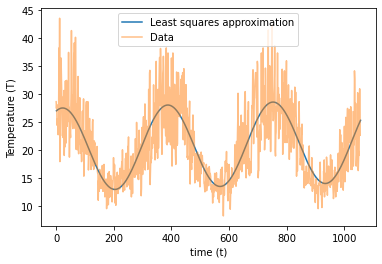

In [31]:
xaxis = np.arange(1, 1057)
yvals = f(xaxis)
plt.plot(xaxis, yvals, label='Least squares approximation')
plt.xlabel('time (t)')
plt.ylabel('Temperature (T)')
plt.plot(temp, linestyle='-', alpha=0.5, label='Data')
plt.legend(loc='upper center');

## Linearizing data

For another example of non-polynomial least squares, consider finding the
function $f(x)=be^{ax}$ with the best least squares fit to some data $(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{m},y_{m})$.
We need to find $a,b$ that minimize
\begin{equation*}
E=\sum_{i=1}^{m}(y_{i}-be^{ax_{i}})^{2}.
\end{equation*}
The normal equations are
\begin{equation*}
\frac{\partial E}{\partial a}=0\text{ and }\frac{\partial E}{\partial b}=0,
\end{equation*}
however, unlike the previous example, this is not a system of linear equations in the unknowns $a,b$. In general, a root finding type method is needed to solve these equations.

There is a simpler approach we can use when we suspect the data is
exponentially related. Consider again the function we want to fit:

\begin{equation}\label{eq:exp_fit}
y=be^{ax}.
\end{equation}

Take the logarithm of both sides:
\begin{equation*}
\log y=\log b+ax
\end{equation*}
and rename the variables as $Y=\log y,B=\log b$. Then we obtain the
expression

\begin{equation}\label{eq:lin_fit}
Y=ax+B
\end{equation}

which is a linear equation in the transformed variable. In other words,
if the original variable $y$ is related to $x$ via Equation \eqref{eq:exp_fit},
then $Y=\log y$ is related to $x$ via a linear relationship given
by Equation \eqref{eq:lin_fit}. So, the new approach is to fit the
least squares line $Y=ax+B$ to the data
\begin{equation*}
(x_{1},\log y_{1}),(x_{2},\log y_{2}),...,(x_{m},\log y_{m}).
\end{equation*}

However, it is important to realize that the least squares fit to
the transformed data is not necessarily the same as the least squares
fit to the original data. The reason is the deviations which least
squares minimize are distorted in a non-linear way by the transformation.

\begin{example}\label{example:chap5_exa85}
Consider the following data

|$x$ | 0 | 1 | 2 | 3 | 4 | 5 |
|:---|:---|:---|:---|:---|:---|:---|
|$y$ | 3 | 5 | 8| 12 | 23 | 37 |

to which we will fit $y=be^{ax}$ in the least-squares sense. The following table displays the data $(x_i,\log y_i)$, using two-digits:

|$x$ | 0 | 1 | 2 | 3 | 4 | 5 |
|:---|:---|:---|:---|:---|:---|:---|
|$Y=\log y$ | 1.1 | 1.6 | 2.1 | 2.5 | 3.1 | 3.6 |
\end{example}

We use the Python code **leastsqfit** to fit a line to this data:

In [32]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1.1, 1.6, 2.1, 2.5, 3.1, 3.6])

In [33]:
leastsqfit(x, y, 1)

array([1.09047619, 0.49714286])

Therefore the least squares line, using two-digits, is
\begin{equation*}
Y=0.5x+1.1.
\end{equation*}
This equation corresponds to Equation \eqref{eq:lin_fit}, with $a=0.5$ and $B=1.1$. We want to obtain the corresponding exponential Equation \eqref{eq:exp_fit}, where $b=e^B$. Since $e^{1.1}=3$, the best fitting exponential function to the data is $y=3e^{x/2}$. The following graph plots $y=3e^{x/2}$ together with the data.

<img src="./images/expdata_exp.png" class="bg-primary mb-1" width="400px">

**Exercise 6.1-1**

Find the function of the form $y=ae^x+b \sin (4 x)$ that best fits the data below in the least squares sense.

|$x$ | 1 | 2 | 3 | 4 | 5 |
|:---|:---|:---|:---|:---|:---|
|$y$ | -4 | 6 | -1 | 5 | 20 |

Plot the function and the data together.

**Exercise 6.1-2**

Power-law type relationships are observed in many empirical data. Two variables $y$, $x$ are said to be related via a power-law if $y=kx^\alpha$, where $k,\alpha$ are some constants. The following data[^2] lists the top 10 family names in the order of occurrence according to Census 2000. Investigate whether relative frequency of occurrences and the rank of the name are related via a power-law, by

a) Let $y$ be the relative frequencies (number of occurrences divided by the total number of occurrences), and $x$ be the rank, that is, 1 through 10.

b) Use least squares to find a function of the form $y=kx^\alpha$. Use linearization.

c) Plot the data together with the best fitting function found in part (b).

|Name | Number of Occurrences|
|:---|:---|
|Smith | 2,376,206|
|Johnson | 1,857,160|
|Williams | 1,534,042|
|Brown | 1,380,145|
|Jones | 1,362,755|
|Miller | 1,127,803|
|Davis | 1,072,335|
|Garcia | 858,289|
|Rodriguez | 804,240|
|Wilson | 783,051|

[^1]: https://www.census.gov/topics/population/genealogy/data/2000\_surnames.html

[^2]: http://www.bom.gov.au/climate/data/

**References**

M.T. Heath. Scientific Computing: An introductory survey. McGraw-Hill, 1997.